## Non-Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

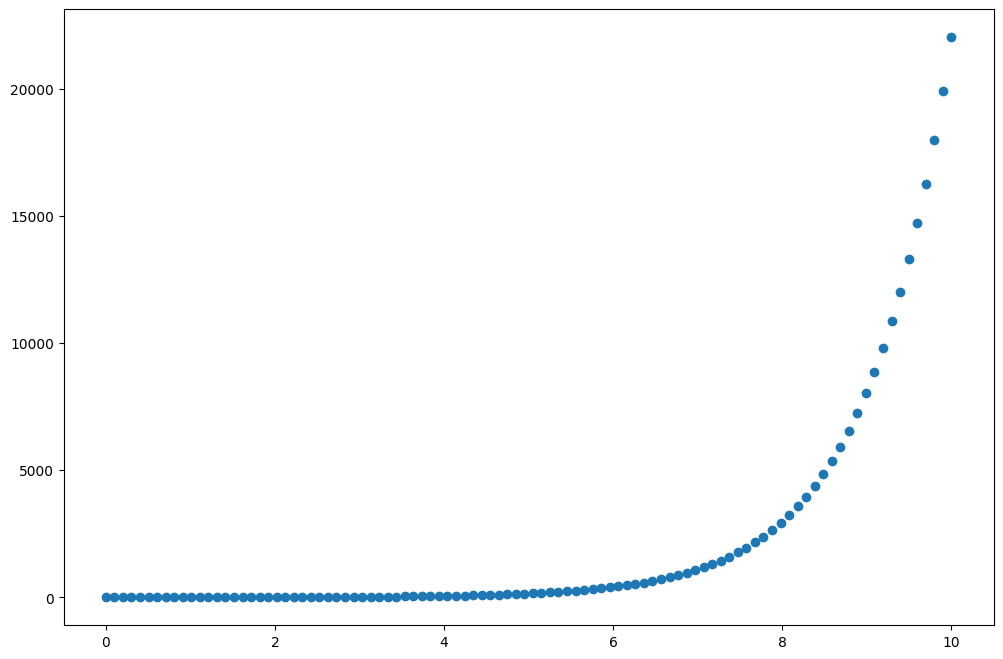

In [2]:
x = np.linspace(0,10,100)
y = np.exp(x)

plt.rcParams['figure.figsize']=(12,8)
plt.scatter(x,y)

y^ = a + θ1 * θ2^x

Polynomial Regression
- Exponantial
- Quadratic
- Cubic


### Polynomial Regression

y^ = θ0 + θ1 * x + θ2 * x^2 + θ3 * x^3


x1= x
x2 = x^2
x3 = x^3

y^ = θ0 + θ1 * x1 + θ2 * x2 + θ3 * x3

Polynomial regression is considered to be a special case of traditional multiple lineer regression.
- Plynomial regressin models can fit using the model of "least squares"
- Minimize the sum of the squares of the differences between y and y^(y_hat)


## Non-linear regression
- non-linear relatiınship between the dependet variable and set of independent variables
- For a model to be considered non-linear y^ must be a non-linear function of the parameters θ , not necessarily the features of x.
- in Non-linear regression, a model is non-linear by parameters.

How can I know if a problem is linear or non-linear?

- Visually figure out relation, use plots of output variables with each input variable.
- Calculate the correlation coefficient between independent and dependent variables.
    - if for all variables it is 0.7 or higher there is a linerity, and it's not appropriate to fit a non-linear regression.

How should I model my data, if it displays non-inear on a scatterplot?
- Plynomial regression
- Non-linear regression model
- Transform your data

---

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [15]:
df = pd.read_csv("data/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [16]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


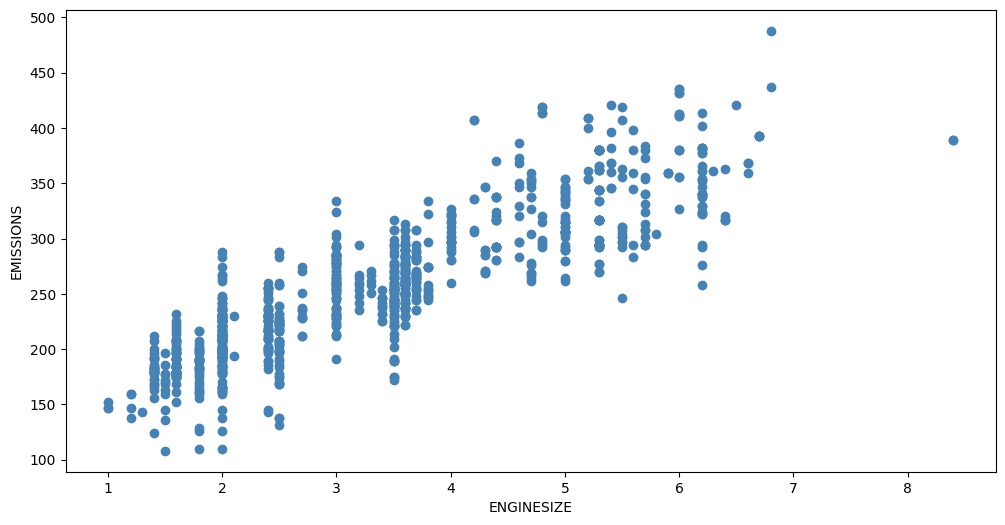

In [17]:
plt.rcParams['figure.figsize'] = (12,6)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeld as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 * x + θ2 * x^2 

For examplr, the original feature set has only one feature : ENGINESIZE 
If we select the degree of polynomial to be 2:
It generates 3 features : degree=0, degree = 1, degree = 2

In [30]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [31]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)


[[ 1.    1.6   2.56]
 [ 1.    2.    4.  ]
 [ 1.    5.4  29.16]
 ...
 [ 1.    3.    9.  ]
 [ 1.    4.7  22.09]
 [ 1.    3.6  12.96]]


- Transformed data looks like feature sets of multiple linear regression analysis.

2nd degree quation would be turn into: y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.



In [32]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [33]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients

print("Coefficients: ", clf.coef_)
print("Intercepts : ", clf.intercept_)

Coefficients:  [[ 0.         48.8822993  -1.24311133]]
Intercepts :  [109.5670635]


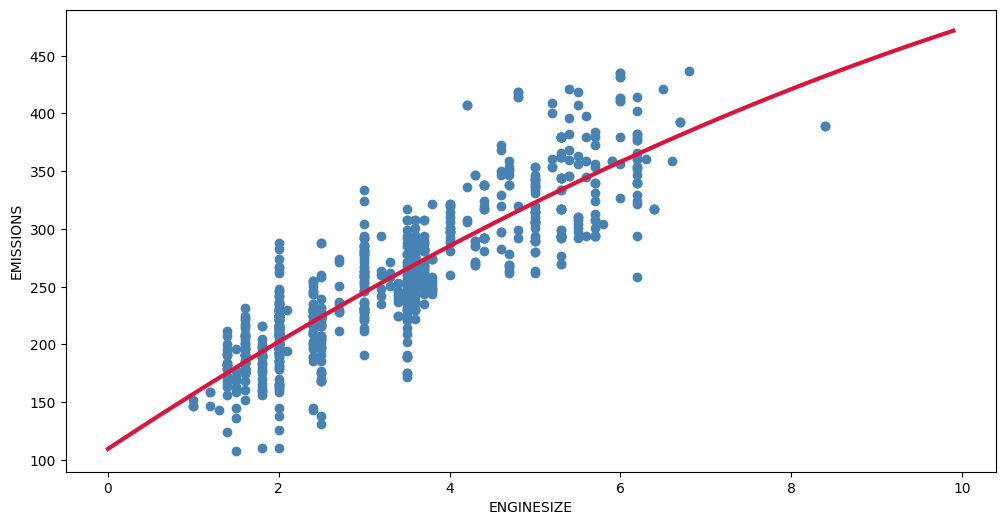

In [34]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy=clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX,2)
plt.plot(XX, yy , "crimson", linewidth = 3)
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()



In [35]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[109.5670635  114.44286231 119.2937989  124.11987327 128.9210854
 133.69743531 138.448923   143.17554845 147.87731169 152.55421269
 157.20625147 161.83342802 166.43574234 171.01319444 175.56578431
 180.09351195 184.59637737 189.07438056 193.52752152 197.95580026
 202.35921677 206.73777105 211.09146311 215.42029294 219.72426054
 224.00336592 228.25760907 232.48699    236.69150869 240.87116516
 245.02595941 249.15589142 253.26096121 257.34116878 261.39651412
 265.42699723 269.43261811 273.41337677 277.3692732  281.3003074
 285.20647938 289.08778913 292.94423665 296.77582195 300.58254502
 

### Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_predict = clf.predict(test_x_poly)

print(f"Mean Absolute Error(MAE): {np.mean(np.absolute(test_y_predict - test_y)):.2f}")
print(f"Mean Squared Error(MSE): {np.mean(np.absolute(test_y_predict - test_y)**2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_predict):.2f}")


Mean Absolute Error(MAE): 22.47
Mean Squared Error(MSE): 871.24
R2-Score: 0.77


## Practice

Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train, test = train_test_split(df, test_size=0.2)

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)


[[  1.      4.7    22.09  103.823]
 [  1.      5.     25.    125.   ]
 [  1.      3.7    13.69   50.653]
 ...
 [  1.      5.7    32.49  185.193]
 [  1.      3.5    12.25   42.875]
 [  1.      4.6    21.16   97.336]]


In [43]:
clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

print("Coefficients: ", clf.coef_)
print("Intercepts : ", clf.intercept_)

Coefficients:  [[ 0.         30.91713164  3.54408332 -0.4063398 ]]
Intercepts :  [129.80215701]


In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy=clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX,2) + clf.coef_[0][3]*np.power(XX,3)
plt.plot(XX, yy , "crimson", linewidth = 3)
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()